In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from reader import NGIMSReader

In [4]:
r = NGIMSReader()

In [65]:
url = "https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2020/06/mvn_ngi_l2_csn-abund-36822_20200603T115804_v08_r01.csv"
df = r.read(url)

In [38]:
from data_path_handler import choose_formatter, NGIMSFilename

In [33]:
import datetime as dt
fb = choose_formatter(pds=True)

In [84]:
files = fb.find_files_within_date_range(dt.datetime(2022, 12, 15), dt.datetime(2023, 3, 2), "csn-abund")
files

['https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49106_20221215T012028_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49108_20221215T045940_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49110_20221215T083853_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49112_20221215T121805_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49132_20221217T005004_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49134_20221217T042916_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49136_20221217T080828_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49138_20221217T11474

In [85]:
files[0], files[-1]

('https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49106_20221215T012028_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2023/03//mvn_ngi_l2_csn-abund-50116_20230301T220257_v08_r03.csv')

<Axes: xlabel='t_utc'>

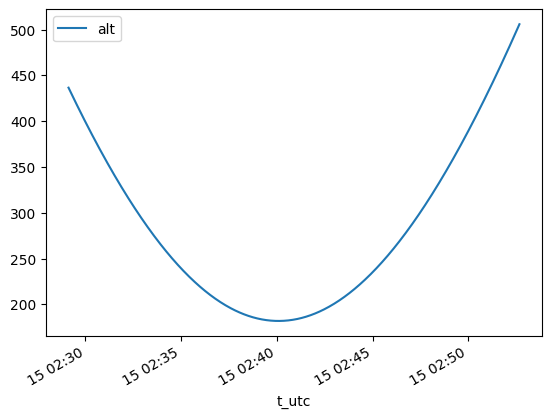

In [64]:
r.read(files[0]).plot(x="t_utc", y="alt")

In [74]:
from reader import NGIMSLoader

In [95]:
l = NGIMSLoader()
dfdt = l.load(date_range=(dt.datetime(2018, 1, 1), dt.datetime(2018,1, 3)), file_label="csn-abund")

In [177]:
dfdt

,t_utc,t_unix,t_sclk_cor,t_tid,tid,orbit,focusmode,alt,lst,long,lat,sza,mass,species,cps_dt_bkd,abundance,precision,quality
0,2018-01-01 01:55:58,1.514772e+09,5.680437e+08,4740.544865,26160,6330,csn,476.4460,3.713889,-54.94879,-72.005270,123.09590,40,Ar,0.0,0.0,0.0,IU
1,2018-01-01 01:56:00,1.514772e+09,5.680437e+08,4742.544865,26160,6330,csn,474.6244,3.735000,-54.63679,-71.949770,123.03140,40,Ar,0.0,0.0,0.0,IU
2,2018-01-01 01:56:02,1.514772e+09,5.680437e+08,4744.544865,26160,6330,csn,472.8066,3.756389,-54.32641,-71.893690,122.96520,40,Ar,0.0,0.0,0.0,IU
3,2018-01-01 01:56:04,1.514772e+09,5.680437e+08,4746.544865,26160,6330,csn,470.9925,3.777500,-54.01764,-71.837040,122.89950,40,Ar,0.0,0.0,0.0,IU
4,2018-01-01 01:56:06,1.514772e+09,5.680437e+08,4748.544865,26160,6330,csn,469.1823,3.798611,-53.71048,-71.779820,122.83320,40,Ar,0.0,0.0,0.0,IU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,2018-01-02 14:12:51,1.514902e+09,5.681743e+08,6147.324865,26176,6338,csn,531.9651,7.715833,-164.63080,7.720597,63.39513,16,O,NaN,NaN,NaN,OU
4226,2018-01-02 14:12:53,1.514902e+09,5.681743e+08,6149.324865,26176,6338,csn,533.9306,7.717778,-164.60830,7.827798,63.32680,16,O,NaN,NaN,NaN,OU
4227,2018-01-02 14:12:55,1.514902e+09,5.681743e+08,6151.324865,26176,6338,csn,535.8996,7.719722,-164.58590,7.934887,63.25858,16,O,NaN,NaN,NaN,OU
4228,2018-01-02 14:12:57,1.514902e+09,5.681743e+08,6153.324865,26176,6338,csn,537.8722,7.721944,-164.56340,8.041866,63.18669,16,O,NaN,NaN,NaN,OU


In [94]:
dfdt["orbit"].unique()

array([6330, 6331, 6332, 6333, 6334, 6335, 6336, 6337, 6338])

In [152]:
import pandas as pd
def IO_orb(orbdata,io='I') -> pd.DataFrame:
    minalt = orbdata['alt'].min()
    peri_t = orbdata[orbdata['alt']==minalt]['t_unix'].unique()
    #if len(peri_t)>1:
    #    sys.exit('Non-unique time found at periapse '+str(orbdata['orbit'].unique()))
    #else:
    if io == 'I':
        return orbdata[orbdata['t_unix']<=peri_t[0]]
    elif io =='O':
        return orbdata[orbdata['t_unix']>peri_t[0]]
    else:
        return orbdata
    
def hp_from_fit(ratio, slope, intercept):
    return (np.log(ratio)-intercept)/slope

In [167]:
single_orb = dfdt[dfdt["orbit"].between(6330, 6336)]
print(single_orb.shape)
single_orb_inbound = IO_orb(single_orb)
single_orb_inbound_abund = single_orb_inbound.pivot_table(values=["abundance"], index=["alt", "species"]).unstack()
# Filter to reasonable values
single_orb_inbound_abund = single_orb_inbound_abund[((single_orb_inbound_abund["abundance"]["Ar"])>0)].dropna(subset=[("abundance", "N2"), (("abundance", "Ar"))]).sort_values("alt")
n2ar_profile = (single_orb_inbound_abund["abundance"]["N2"]/single_orb_inbound_abund["abundance"]["Ar"])

(29604, 18)


In [168]:
single_orb_inbound_abund

abundance                                            \
species             Ar            CO           CO2            He   
alt                                                                
139.7972  1.662252e+07  2.252942e+08  6.458217e+08  1.434379e+06   
139.8005  1.640645e+07  2.213564e+08  6.343717e+08  1.470355e+06   
139.8101  1.638082e+07  2.203913e+08  6.236607e+08  1.493964e+06   
139.8262  1.705553e+07  2.272635e+08  6.489838e+08  1.411694e+06   
139.8487  1.765436e+07  2.304491e+08  6.718445e+08  1.331070e+06   
...                ...           ...           ...           ...   
233.5295  2.981777e+03  5.600924e+05  5.144250e+05  1.376191e+05   
234.5919  1.095241e+03  5.167245e+05  5.173663e+05  1.331933e+05   
235.6599  1.335426e+03  4.803649e+05  4.948414e+05  1.287873e+05   
236.1938  1.443317e+03  4.894095e+05  6.219912e+05  1.794425e+05   
237.2751  4.702728e+02  4.617393e+05  5.988966e+05  1.393720e+05   

                                      
species             N2             O  
alt                                   
139.7972  8.874094e+07  9.711786e+07  
139.8005  8.871532e+07  9.676425e+07  
139.8101  8.859592e+07  9.728099e+07  
139.8262  9.165969e+07  9.952545e+07  
139.8487  9.396142e+07  9.961017e+07  
...                ...           ...  
233.5295  2.758081e+05  4.829289e+06  
234.5919  2.553553e+05  4.712759e+06  
235.6599  2.598909e+05  4.651879e+06  
236.1938  2.654776e+05  4.934638e+06  
237.2751  3.460899e+05  4.869263e+06  

[1442 rows x 6 columns]

In [169]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
import scipy.stats as sps

In [170]:
fit = sps.linregress(n2ar_profile.index.values, np.log(n2ar_profile.values))

101.31239383043292


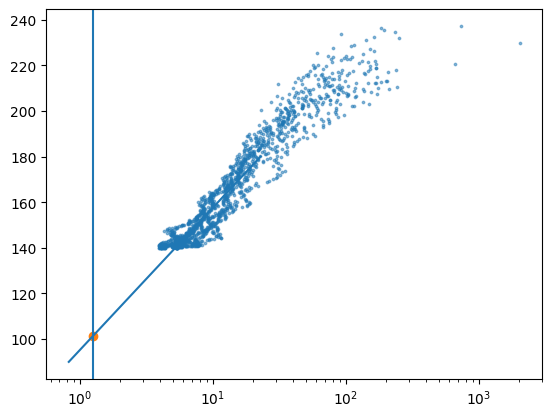

In [174]:
alts = np.linspace(90, 180, 100)

hp = hp_from_fit(1.25, fit[0], fit[1])
print(hp)

plt.figure()
plt.scatter(n2ar_profile, n2ar_profile.index, s=3, alpha=0.5)
plt.plot(np.exp(fit[1]+alts*fit[0]), alts)
plt.axvline(1.25)
plt.scatter(1.25, hp)
plt.xscale("log")

In [ ]:
# set time range you'll look over (2-3 days?)
# determine minimum number of orbits
# reduce to N2 and Ar
# Reduce to inbound
# calculate HP:
#   IO_orb
#   
# find first orbit

Text(0, 0.5, 'Homopause altitude [km]')

<Figure size 1280x960 with 0 Axes>

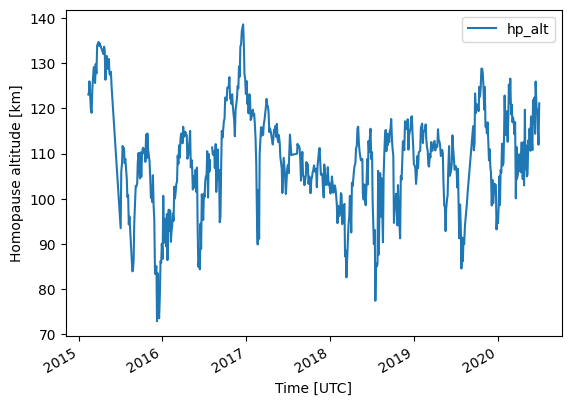

In [ ]:
hpdf = pd.read_csv("../data/homopause_altitudes.csv", parse_dates=["t_utc"])
hpdf.plot(x="t_utc", y="hp_alt")
plt.xlabel("Time [UTC]")
plt.ylabel("Homopause altitude [km]")


In [186]:
hpdf

,hp_alt,t_utc,t_unix,t_sclk_cor,t_tid,tid,orbit,alt,lst,long,lat,sza
0,123.104357,2015-02-12 02:38:50,1.423709e+09,4.769807e+08,5385.563336,14936,718,134.4595,18.58333,98.82664,44.091950,112.42390
1,123.436025,2015-02-14 13:48:12,1.423922e+09,4.771937e+08,5363.253320,14962,731,128.9412,18.30194,-48.66529,42.301650,108.85560
2,126.023695,2015-02-16 20:05:05,1.424117e+09,4.773891e+08,5384.983333,14986,743,128.0760,18.05056,-124.58500,40.722390,105.55130
3,119.751243,2015-02-23 09:48:22,1.424685e+09,4.779569e+08,5390.093335,15056,778,155.8187,17.33222,82.91097,36.023740,95.52260
4,119.048304,2015-02-26 09:55:27,1.424945e+09,4.782165e+08,5388.783336,15088,794,154.6557,17.00861,105.56250,33.732230,90.71274
...,...,...,...,...,...,...,...,...,...,...,...,...
595,119.999771,2020-06-17 19:11:46,1.592421e+09,6.456930e+08,4381.933497,37012,11756,176.2236,14.24694,-142.06310,3.815288,39.08484
596,119.807355,2020-06-20 22:46:08,1.592693e+09,6.459650e+08,4384.223152,37054,11777,178.3897,13.87278,-170.65580,7.100394,36.95492
597,115.789008,2020-06-23 08:20:39,1.592900e+09,6.461723e+08,4386.643154,37086,11793,178.6431,13.58722,64.76538,9.599099,36.08690
598,111.971610,2020-06-26 08:18:37,1.593160e+09,6.464314e+08,4387.523155,37126,11813,180.7106,13.22528,89.02947,12.838460,36.08258
